# Insurance Data Analysis - Exploratory Data Analysis (EDA)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sys
import os
import matplotlib 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


In [2]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from utils import load_data
df = load_data("../data/MachineLearningRating_v3.txt")

c:\Users\gtaye\Documents\10Acadamy\week3\scripts\utils.py:13: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file, delimiter='|') # Delimeter


File successfully converted and saved as ../data/MachineLearningRating_v3.csv


In [4]:
from insurance_data_analysis import InsuranceDataAnalysis

In [5]:
df

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [6]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
df.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [9]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [10]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

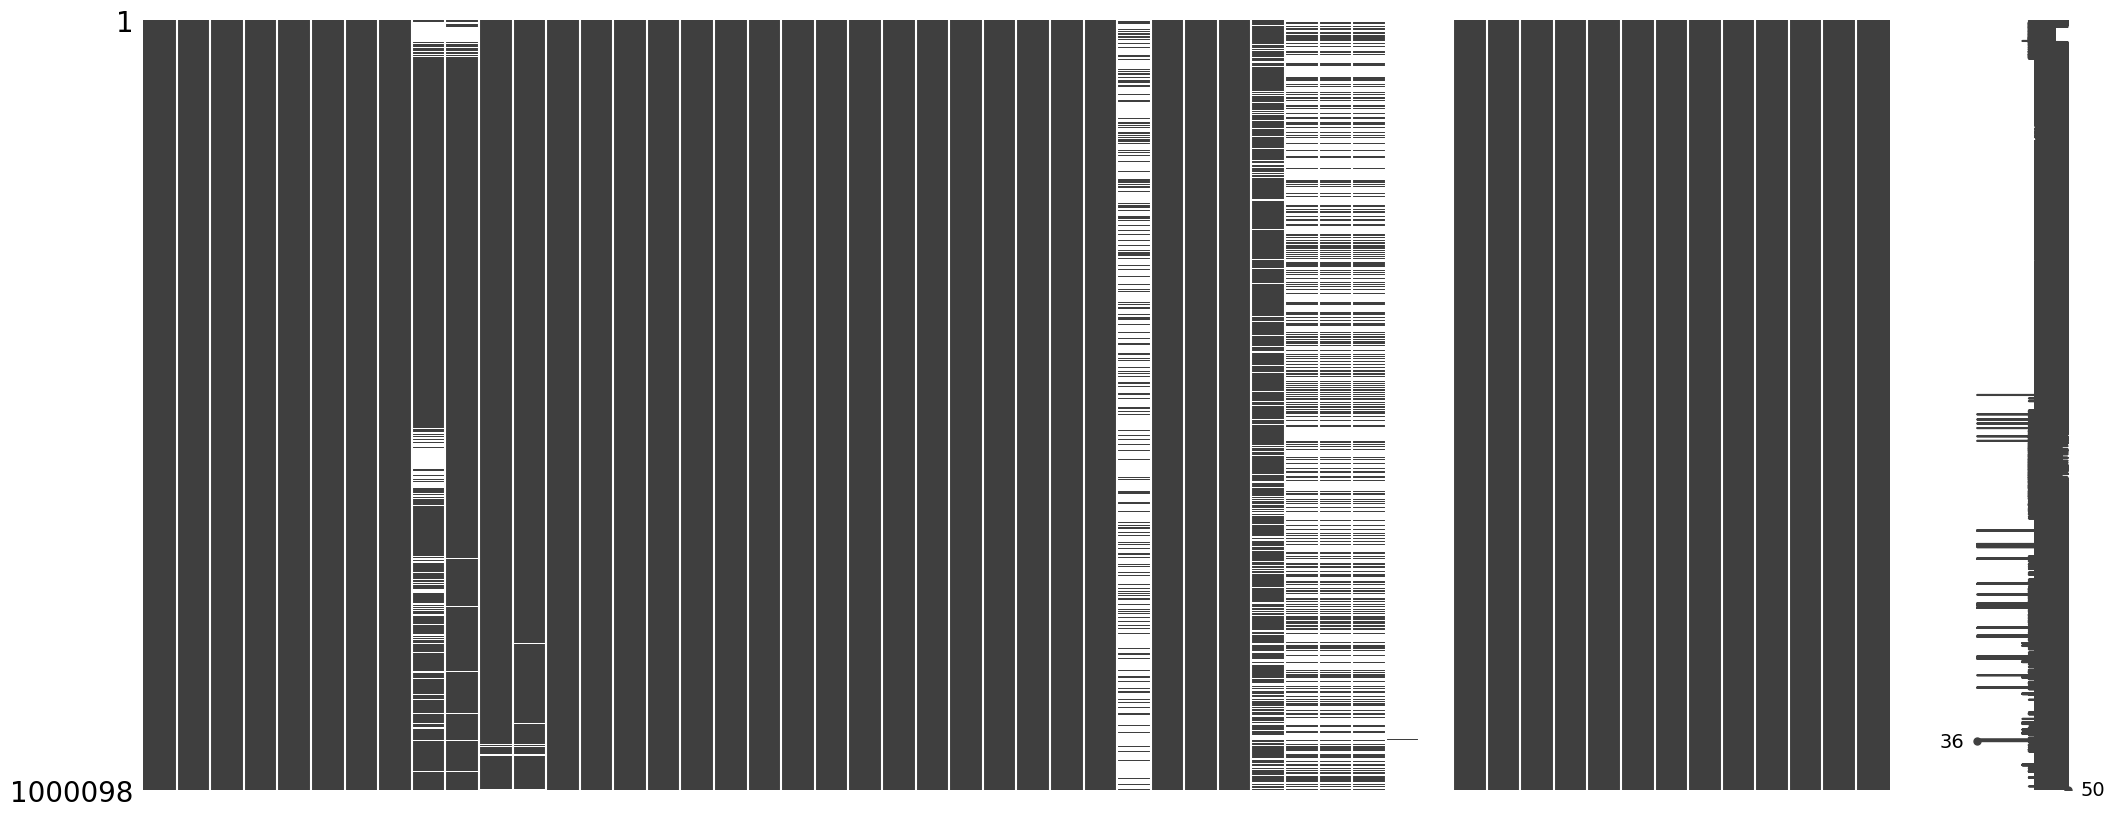

In [11]:
# Visualize missing values
msno.matrix(df)
plt.show()


### Summary of missing values

In [12]:

df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

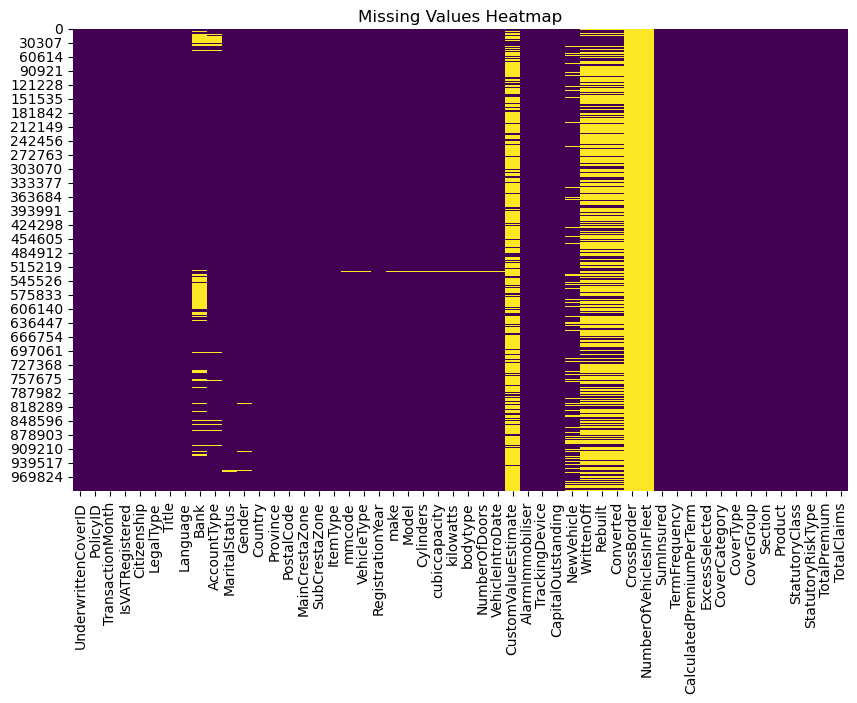

In [13]:

# Simple heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [15]:
print(f"Gender column has {df['Gender'].isnull().sum()} missing values")
df['Gender'].unique()
df['Gender'].value_counts()

Gender column has 9536 missing values


Gender
Not specified    940990
Male              42817
Female             6755
Name: count, dtype: int64

In [16]:
df['MaritalStatus'] = df['MaritalStatus'].fillna('Not specified')
df['Gender'] = df['Gender'].fillna('Not specified')
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [17]:
df.isnull().sum()[df.isnull().sum() > 0]

Bank                        145961
AccountType                  40232
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

### droping columns that are not needed and doesn't have significant effect 

In [18]:
df.drop(columns=['NewVehicle', 'CustomValueEstimate', 'WrittenOff', 'NewVehicle', 'Rebuilt', 'Converted', 'CrossBorder','NumberOfVehiclesInFleet'], inplace=True)

df.dropna(subset=['mmcode', 'VehicleType', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts','bodytype', 'NumberOfDoors', 'VehicleIntroDate','CapitalOutstanding' ], inplace=True)

In [19]:
df.isnull().sum()

UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
Bank                        145959
AccountType                  40230
MaritalStatus                    0
Gender                           0
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                           0
VehicleType                      0
RegistrationYear                 0
make                             0
Model                            0
Cylinders                        0
cubiccapacity                    0
kilowatts                        0
bodytype                         0
NumberOfDoors                    0
VehicleIntroDate    

In [20]:
df.drop(columns=['Bank','AccountType'], inplace=True)

In [21]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate',
       'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [23]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,999544.000000,999544.000000,999544.000000,9.995440e+05,999544.000000,999544.000000,999544.000000,999544.000000,999544.000000,9.995440e+05,999544.000000,999544.000000,999544.000000
mean,104805.651873,7956.004267,3019.836643,5.487769e+07,2010.224983,4.046642,2466.743461,97.207964,4.019250,6.038605e+05,116.161425,61.372350,64.340199
std,63297.157788,5290.000123,2649.389643,1.360382e+07,3.261203,0.294020,442.801023,19.393250,0.468315,1.507329e+06,220.576166,157.014098,2369.567085
min,1.000000,14.000000,1.000000,4.041200e+06,1987.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-02,0.000000,-782.576754,-12002.412281
25%,55128.000000,4500.000000,821.000000,6.005692e+07,2008.000000,4.000000,2237.000000,75.000000,4.000000,5.000000e+03,3.225700,0.000000,0.000000
50%,94073.000000,7071.000000,2000.000000,6.005842e+07,2011.000000,4.000000,2694.000000,111.000000,4.000000,7.500000e+03,8.436900,2.179737,0.000000
75%,139190.000000,11077.000000,4171.000000,6.005842e+07,2013.000000,4.000000,2694.000000,111.000000,4.000000,2.500000e+05,90.000000,21.929825,0.000000
max,301175.000000,23246.000000,9870.000000,6.506535e+07,2015.000000,10.000000,12880.000000,309.000000,6.000000,1.000000e+07,3051.821100,2253.507281,393092.105263


### to simplify our analysis we will drop negative values for TC and TP

In [24]:
df.drop(df[df['TotalPremium'] < 0].index, inplace=True)

In [25]:
df.drop(df[df['TotalClaims'] < 0].index, inplace=True)

In [26]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,999253.000000,999253.000000,999253.000000,9.992530e+05,999253.000000,999253.000000,999253.000000,999253.000000,999253.000000,9.992530e+05,999253.000000,999253.000000,999253.000000
mean,104829.875293,7957.823061,3019.439475,5.488212e+07,2010.224674,4.046653,2466.737279,97.206250,4.019259,6.038895e+05,116.155039,61.420516,64.377607
std,63282.355095,5289.103997,2649.598272,1.359715e+07,3.261510,0.294058,442.838372,19.394867,0.468374,1.507362e+06,220.573433,156.974271,2369.873974
min,1.000000,14.000000,1.000000,4.041200e+06,1987.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-02,0.000000,0.000000,0.000000
25%,55150.000000,4500.000000,812.000000,6.005692e+07,2008.000000,4.000000,2237.000000,75.000000,4.000000,5.000000e+03,3.225700,0.000000,0.000000
50%,94087.000000,7071.000000,2000.000000,6.005842e+07,2011.000000,4.000000,2694.000000,111.000000,4.000000,7.500000e+03,8.436900,2.180175,0.000000
75%,139193.000000,11079.000000,4171.000000,6.005842e+07,2013.000000,4.000000,2694.000000,111.000000,4.000000,2.500000e+05,90.000000,21.929825,0.000000
max,301175.000000,23246.000000,9870.000000,6.506535e+07,2015.000000,10.000000,12880.000000,309.000000,6.000000,1.000000e+07,3051.821100,2253.507281,393092.105263


### Univariate Analysis

In [27]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,MaritalStatus,Gender,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,Not specified,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,Not specified,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,Not specified,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,Not specified,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,Not specified,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


array([[<Axes: title={'center': 'UnderwrittenCoverID'}>,
        <Axes: title={'center': 'PolicyID'}>,
        <Axes: title={'center': 'PostalCode'}>,
        <Axes: title={'center': 'mmcode'}>],
       [<Axes: title={'center': 'RegistrationYear'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'cubiccapacity'}>,
        <Axes: title={'center': 'kilowatts'}>],
       [<Axes: title={'center': 'NumberOfDoors'}>,
        <Axes: title={'center': 'SumInsured'}>,
        <Axes: title={'center': 'CalculatedPremiumPerTerm'}>,
        <Axes: title={'center': 'TotalPremium'}>],
       [<Axes: title={'center': 'TotalClaims'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

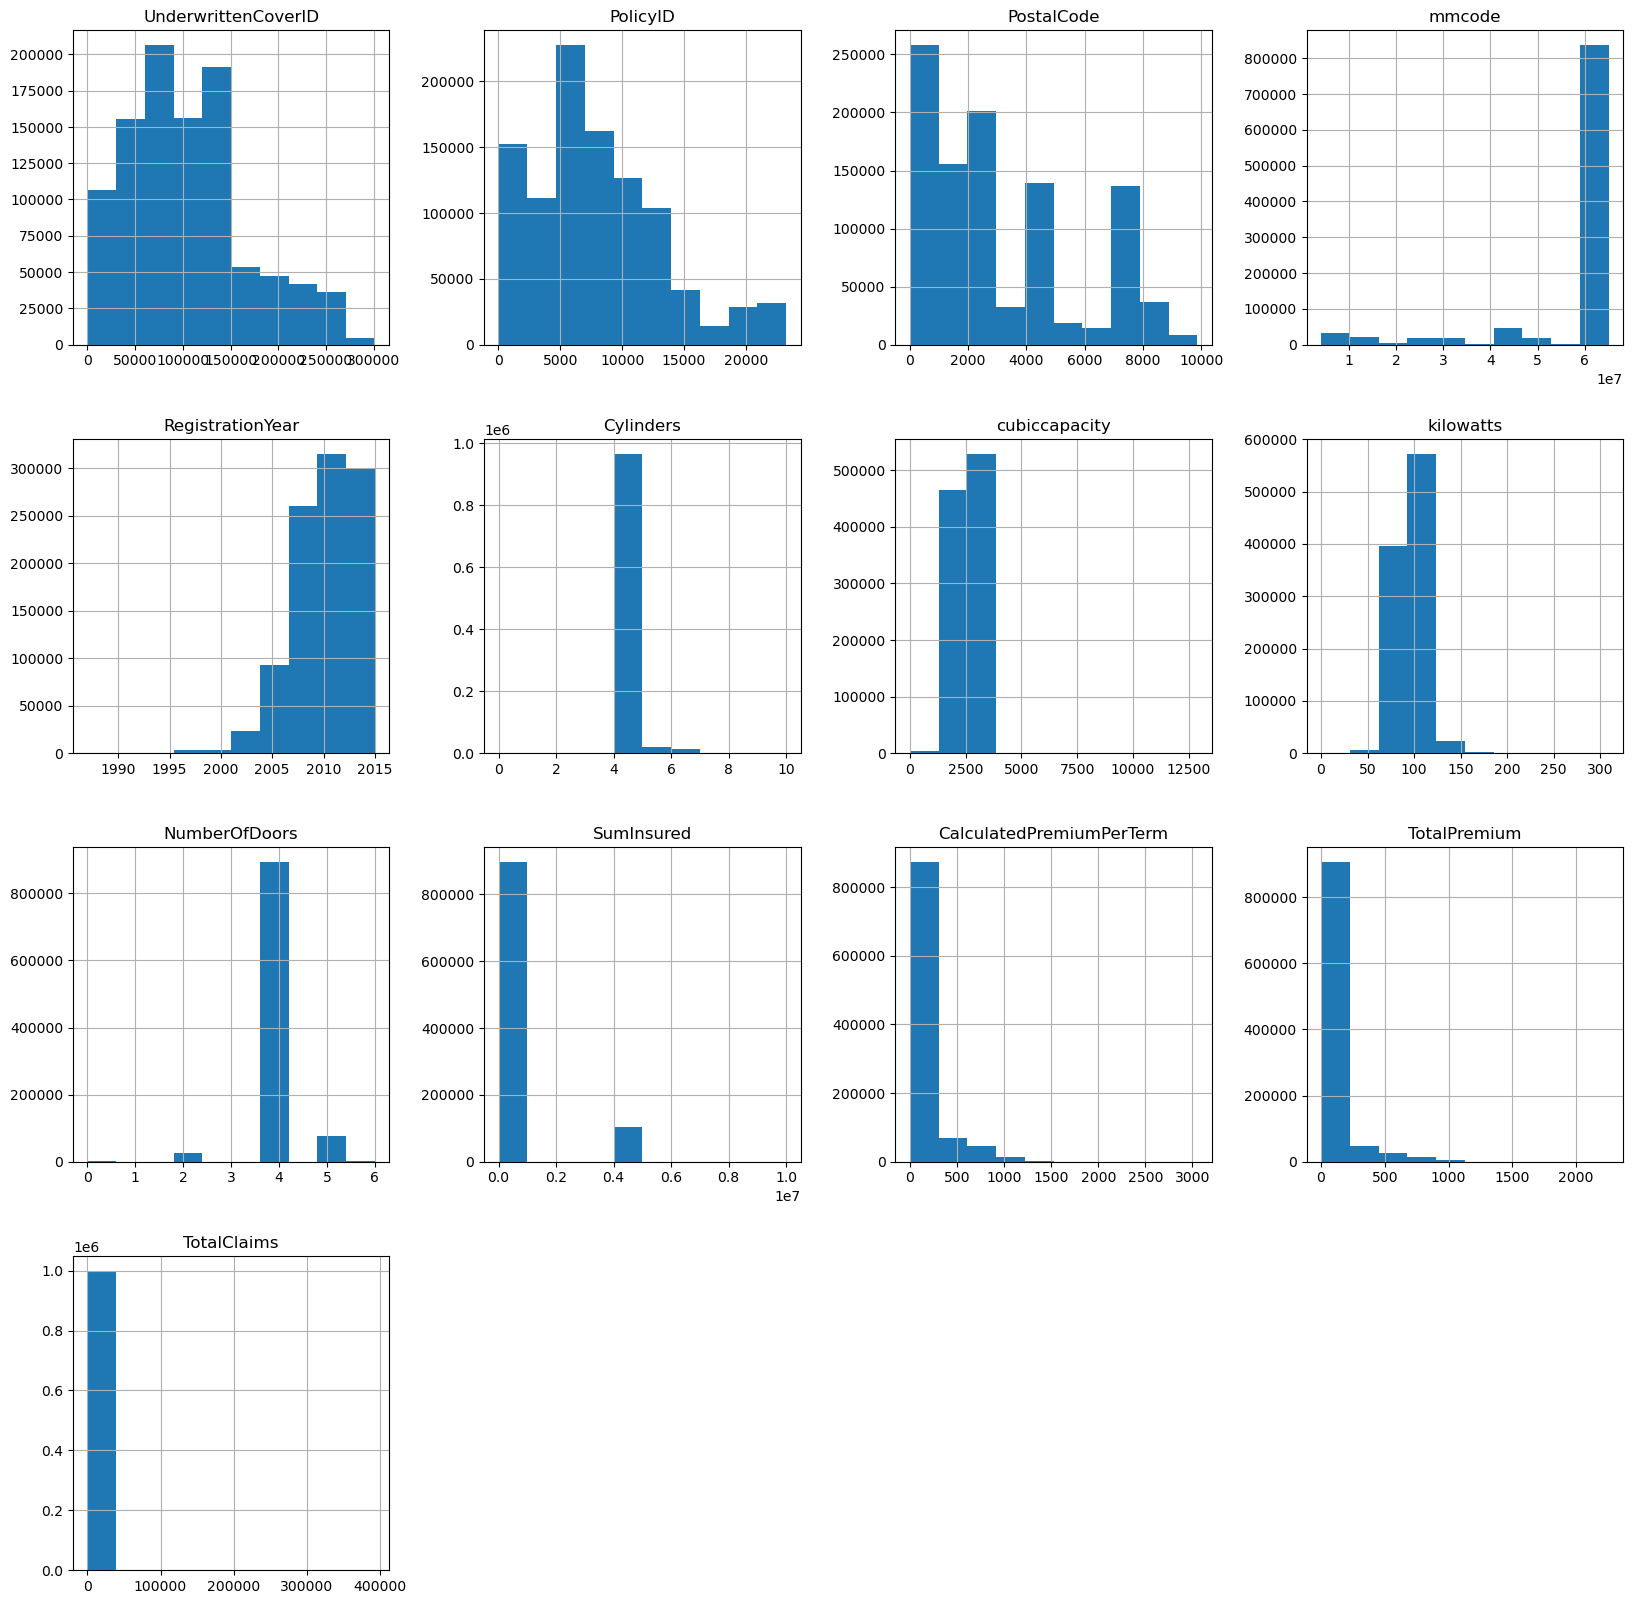

In [28]:
df.hist(figsize=(20, 20))

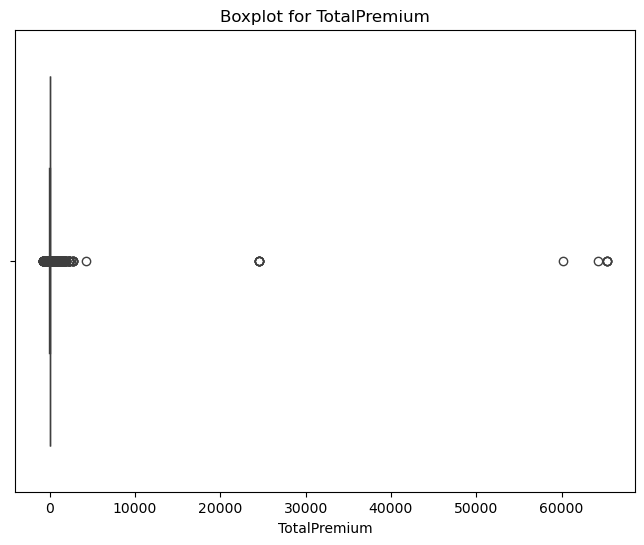

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for TotalPremium
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalPremium'])
plt.title("Boxplot for TotalPremium")
plt.show()


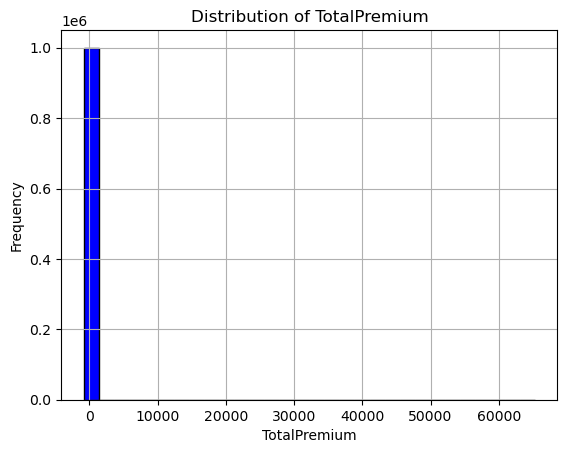

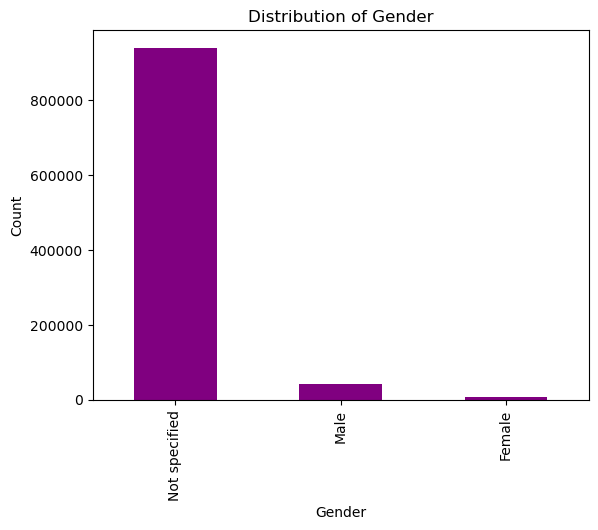

In [17]:
# Histogram for TotalPremium
df['TotalPremium'].hist(bins=30, color='blue', edgecolor='black')
plt.title("Distribution of TotalPremium")
plt.xlabel("TotalPremium")
plt.ylabel("Frequency")
plt.show()

# Bar chart for categorical variable (Example: Gender)
df['Gender'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


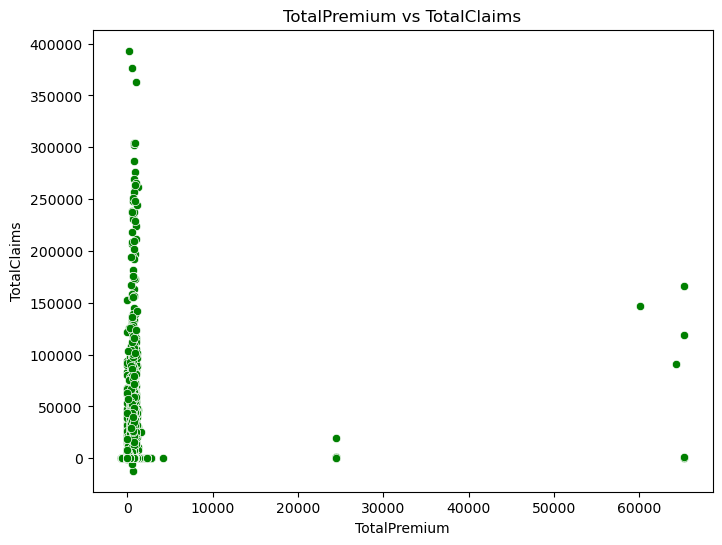

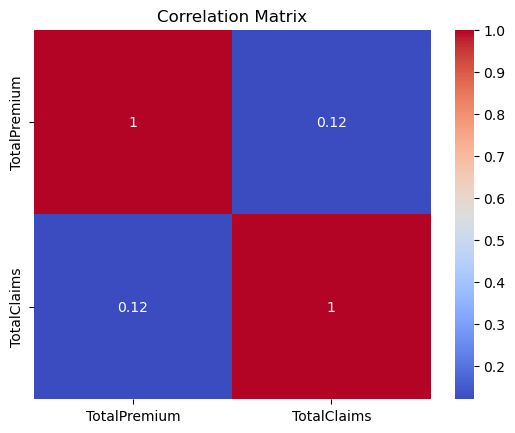

In [18]:
# Scatter plot: TotalPremium vs TotalClaims
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['TotalPremium'], y=df['TotalClaims'], color='green')
plt.title("TotalPremium vs TotalClaims")
plt.xlabel("TotalPremium")
plt.ylabel("TotalClaims")
plt.show()

# Correlation matrix
correlation_matrix = df[['TotalPremium', 'TotalClaims']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


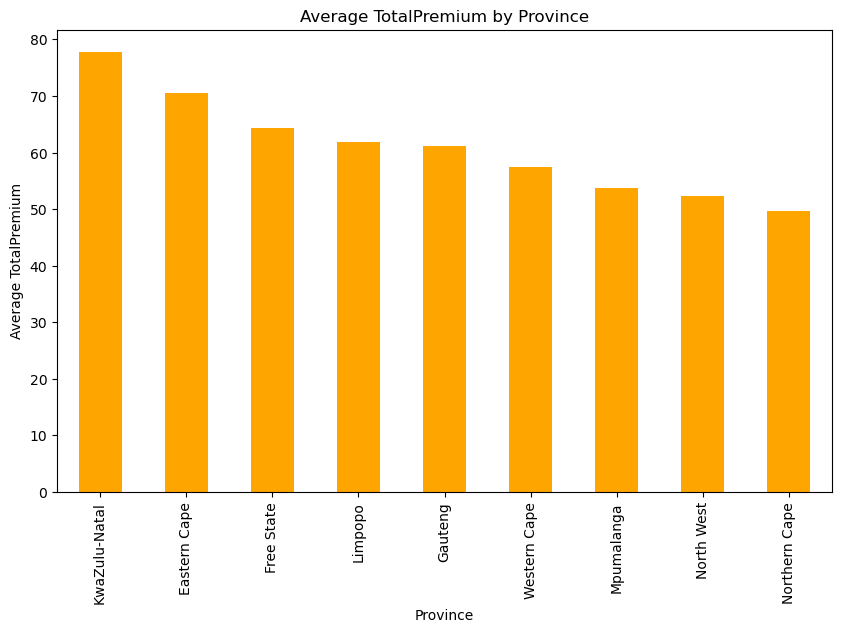

In [19]:
# Group by Province and compute average TotalPremium
province_premium = df.groupby('Province')['TotalPremium'].mean().sort_values(ascending=False)

# Bar chart for average TotalPremium by Province
province_premium.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Average TotalPremium by Province")
plt.xlabel("Province")
plt.ylabel("Average TotalPremium")
plt.show()


### Bivariate Analysis

In [30]:
#sorting the data by province and transaction month
df.sort_values(by=['Province','TransactionMonth'], inplace=True)

### monthly change in TC and TP

In [31]:
df['PremiumChange'] = df.groupby('Province')['TotalPremium'].diff()
df['ClaimChange'] = df.groupby('Province')['TotalClaims'].diff()
df.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,MaritalStatus,Gender,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,PremiumChange,ClaimChange
1000001,31118,402,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,Not specified,Male,...,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,45.486930,0.0,-348.407281,0.0
1000008,31095,402,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,Not specified,Male,...,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1.308772,0.0,-44.178158,0.0
1000039,31504,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,Single,Male,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,21.929825,0.0,20.621053,0.0
1000054,31510,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,Single,Male,...,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,1.557719,0.0,-20.372105,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,Single,Male,...,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0,345.677456,0.0


In [34]:
# gender and TotalPremium
print('Gender and TotalPremium')
df.groupby('Gender')['TotalPremium'].describe()

Gender and TotalPremium


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,6755.0,45.074841,140.912557,0.0,0.0,0.644561,5.198333,1028.579561
Male,42576.0,37.735306,117.465350,0.0,0.0,0.000000,5.583421,934.842281
Not specified,949922.0,62.598336,158.532428,0.0,0.0,2.255965,21.929825,2253.507281


In [35]:
# marital status and TotalPremium
df.groupby('MaritalStatus')['TotalPremium'].describe()

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Married,1377.0,77.579172,205.762644,0.0,1.020526,3.222807,21.929825,1538.957719
Not specified,993622.0,61.539155,157.048041,0.0,0.000000,2.191491,21.929825,2253.507281
Single,4254.0,28.479117,111.092194,0.0,0.000000,0.000000,1.806518,864.725702


In [36]:
# province and TotalPremium
df.groupby('Province')['TotalPremium'].describe()

,count,mean,std,min,25%,50%,75%,max
Province,,,,,,,,
Eastern Cape,30332.0,70.562530,179.938153,0.0,0.0,2.440702,36.364166,1351.353158
Free State,8099.0,64.373780,141.152176,0.0,0.0,3.592281,43.859649,935.561404
Gauteng,393604.0,61.100490,154.251777,0.0,0.0,2.148509,21.929825,2253.507281
KwaZulu-Natal,169535.0,78.071094,197.798568,0.0,0.0,2.684386,21.929825,1486.679035
Limpopo,24836.0,61.899038,136.736421,0.0,0.0,3.172807,43.859649,1086.091491
Mpumalanga,52636.0,53.881480,132.310007,0.0,0.0,1.813947,21.929825,1094.828684
North West,143287.0,52.276258,124.258331,0.0,0.0,1.833005,21.929825,1450.738246
Northern Cape,6380.0,49.617253,123.099181,0.0,0.0,1.504035,21.929825,913.532018
Western Cape,170544.0,54.222329,147.528975,0.0,0.0,1.726404,15.789474,1344.592632


In [37]:
# gender and TotalClaims
df.groupby('Gender')['TotalClaims'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,6755.0,37.046055,1094.086939,0.0,0.0,0.0,0.0,55411.403509
Male,42576.0,32.804959,1404.590863,0.0,0.0,0.0,0.0,193860.526316
Not specified,949922.0,65.987068,2410.597412,0.0,0.0,0.0,0.0,393092.105263


In [38]:
# marital status and TotalClaims
df.groupby('MaritalStatus')['TotalClaims'].describe()

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Married,1377.0,81.123599,1392.964484,0.0,0.0,0.0,0.0,32782.026316
Not specified,993622.0,64.543633,2375.149783,0.0,0.0,0.0,0.0,393092.105263
Single,4254.0,20.177659,978.562550,0.0,0.0,0.0,0.0,58245.614035


In [39]:
# province and TotalClaims
df.groupby('Province')['TotalClaims'].describe()

,count,mean,std,min,25%,50%,75%,max
Province,,,,,,,,
Eastern Cape,30332.0,44.719328,2343.763799,0.0,0.0,0.0,0.0,238842.720526
Free State,8099.0,43.822975,2074.340982,0.0,0.0,0.0,0.0,157520.359649
Gauteng,393604.0,74.710641,2450.856915,0.0,0.0,0.0,0.0,376432.491228
KwaZulu-Natal,169535.0,84.356519,2739.958329,0.0,0.0,0.0,0.0,302361.149123
Limpopo,24836.0,40.927553,1627.585841,0.0,0.0,0.0,0.0,133042.385965
Mpumalanga,52636.0,38.859010,1652.640167,0.0,0.0,0.0,0.0,158089.447368
North West,143287.0,41.317426,1834.832763,0.0,0.0,0.0,0.0,286686.431053
Northern Cape,6380.0,14.026726,513.864858,0.0,0.0,0.0,0.0,25433.394737
Western Cape,170544.0,57.690558,2516.185450,0.0,0.0,0.0,0.0,393092.105263


#### encoding the gender, province and marital status columns. 

In [40]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Province'] = label_encoder.fit_transform(df['Province'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df.head(3)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,MaritalStatus,Gender,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,PremiumChange,ClaimChange
596548,13562,443,2014-04-01 00:00:00,False,,Individual,Mr,English,1,2,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,15.789474,0.0,NaN,NaN
623788,13560,443,2014-04-01 00:00:00,False,,Individual,Mr,English,1,2,...,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,1.644211,0.0,-14.145263,0.0
623800,13557,443,2014-04-01 00:00:00,False,,Individual,Mr,English,1,2,...,Emergency Charges,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,4.932456,0.0,3.288246,0.0


In [42]:
df.describe()

,UnderwrittenCoverID,PolicyID,MaritalStatus,Gender,Province,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims,PremiumChange,ClaimChange
count,999253.000000,999253.000000,999253.000000,999253.000000,999253.000000,999253.000000,9.992530e+05,999253.000000,999253.000000,999253.000000,999253.000000,999253.000000,9.992530e+05,999253.000000,999253.000000,999253.000000,999244.000000,9.992440e+05
mean,104829.875293,7957.823061,1.002879,1.943872,3.938112,3019.439475,5.488212e+07,2010.224674,4.046653,2466.737279,97.206250,4.019259,6.038895e+05,116.155039,61.420516,64.377607,0.001502,1.018267e-17
std,63282.355095,5289.103997,0.075013,0.257872,2.390504,2649.598272,1.359715e+07,3.261510,0.294058,442.838372,19.394867,0.468374,1.507362e+06,220.573433,156.974271,2369.873974,214.295754,3.350851e+03
min,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,4.041200e+06,1987.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-02,0.000000,0.000000,0.000000,-2253.507281,-3.930921e+05
25%,55150.000000,4500.000000,1.000000,2.000000,2.000000,812.000000,6.005692e+07,2008.000000,4.000000,2237.000000,75.000000,4.000000,5.000000e+03,3.225700,0.000000,0.000000,-5.216140,0.000000e+00
50%,94087.000000,7071.000000,1.000000,2.000000,3.000000,2000.000000,6.005842e+07,2011.000000,4.000000,2694.000000,111.000000,4.000000,7.500000e+03,8.436900,2.180175,0.000000,0.000000,0.000000e+00
75%,139193.000000,11079.000000,1.000000,2.000000,6.000000,4171.000000,6.005842e+07,2013.000000,4.000000,2694.000000,111.000000,4.000000,2.500000e+05,90.000000,21.929825,0.000000,5.820351,0.000000e+00
max,301175.000000,23246.000000,2.000000,2.000000,8.000000,9870.000000,6.506535e+07,2015.000000,10.000000,12880.000000,309.000000,6.000000,1.000000e+07,3051.821100,2253.507281,393092.105263,2253.507281,3.930921e+05


In [43]:
df.to_csv('../data/cleaned_df.csv', index=False)